In [131]:
import pandas as pd
import missingno as msno

In [132]:
df = pd.read_csv("sakam_knigi_books.csv", encoding='utf-8-sig')

In [133]:
df.isnull().sum()

Title              0
Author          1614
Real Price         0
Sale Price         0
Sale               0
Category           0
Retrieved At       0
dtype: int64

### Clean Author Column

In [134]:
df['Author'] = df['Author'].str.replace("од:", "")

### Clean Real Price and Sale Price Columns

In [135]:
# df["Real Price"] = df["Real Price"].str.replace(" ден", "").str.strip()
# df["Real Price"] = pd.to_numeric(df["Real Price"], errors="coerce")

In [136]:
# df["Sale Price"] = df["Sale Price"].str.replace(" ден", "").str.strip()
# df["Sale Price"] = pd.to_numeric(df["Sale Price"], errors="coerce")

In [137]:
df.to_csv("sakam_knigi_books.csv", encoding='utf-8-sig', index=False)
df = pd.read_csv("sakam_knigi_books.csv", encoding='utf-8-sig')

In [138]:
df.isnull().sum()

Title              0
Author          1614
Real Price         0
Sale Price         0
Sale               0
Category           0
Retrieved At       0
dtype: int64

<Axes: >

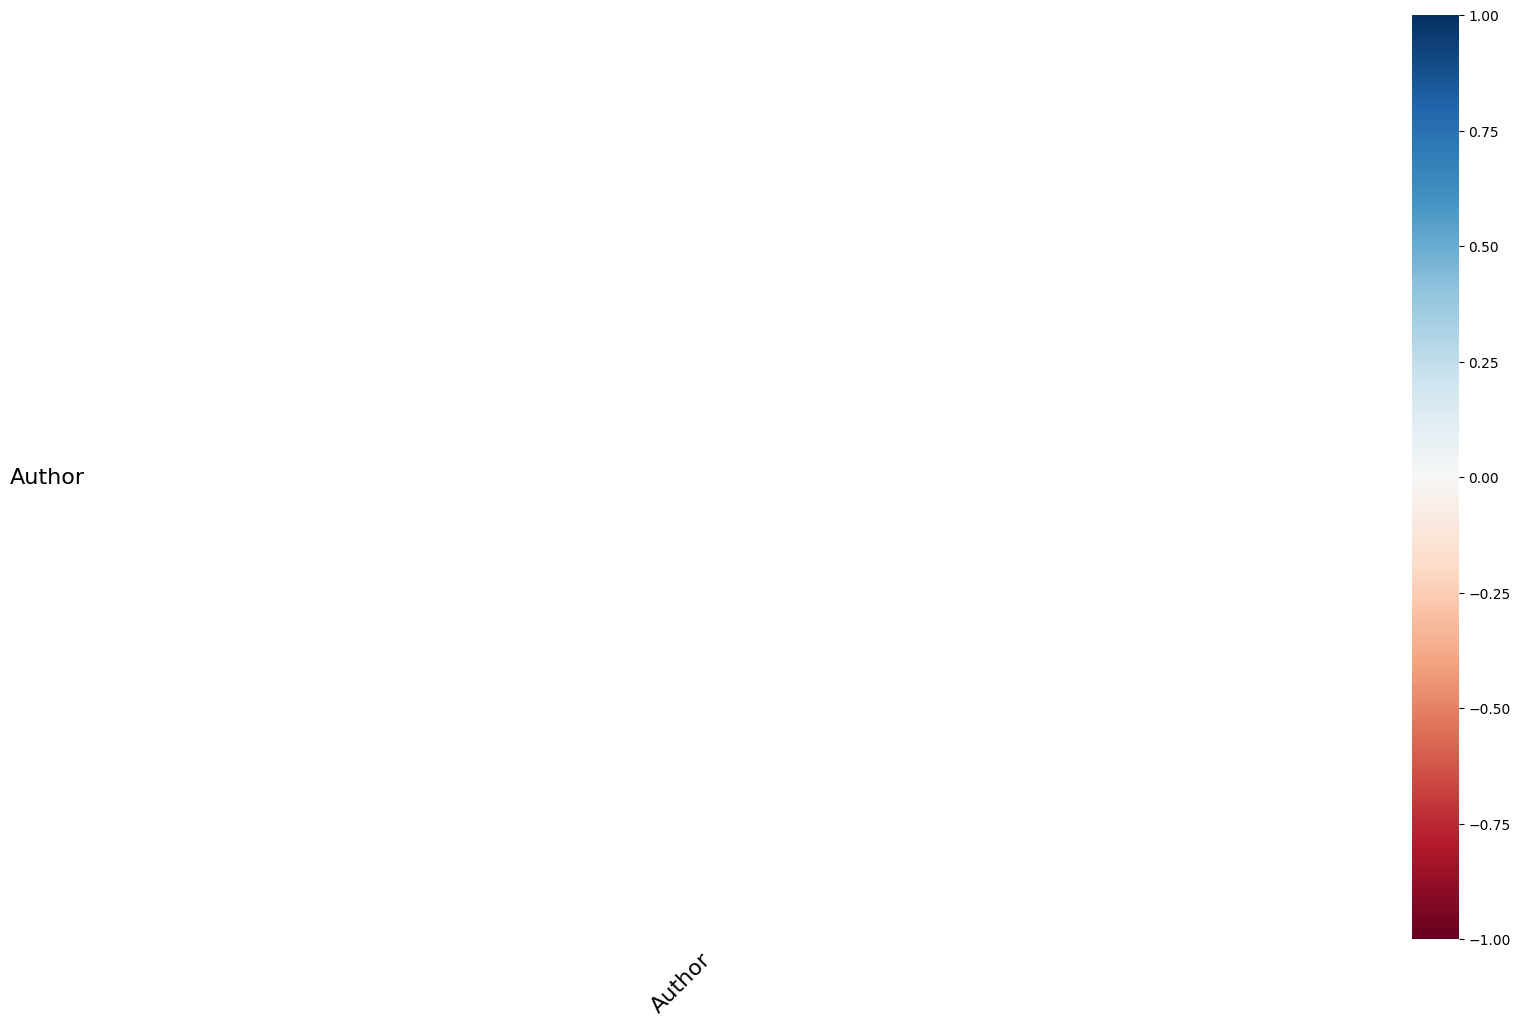

In [139]:
msno.heatmap(df)

In [140]:
df[df['Real Price'].isnull()].head(15)

,Title,Author,Real Price,Sale Price,Sale,Category,Retrieved At


In [141]:
# -1 where the Real Price and Sale Price is missing
df['Real Price'] = df['Real Price'].fillna(-1)
df['Sale Price'] = df['Sale Price'].fillna(-1)

In [142]:
df.isnull().sum()

Title              0
Author          1614
Real Price         0
Sale Price         0
Sale               0
Category           0
Retrieved At       0
dtype: int64

### Duplicates

10 entries are completely identical. We can merge, keep only one

In [143]:
duplicates = df[df.duplicated(keep=False)]
duplicates = duplicates.sort_values(by=['Title', 'Author'])
print("Length of duplicates: ", len(duplicates))
duplicates.head(20)

Length of duplicates:  0


,Title,Author,Real Price,Sale Price,Sale,Category,Retrieved At


In [144]:
print("Original:", len(df))
df = df.drop_duplicates()
print("After drop_duplicates:", len(df))
print("Duplicates removed:", len(df) - len(df))

Original: 2164
After drop_duplicates: 2164
Duplicates removed: 0


In [145]:
df.to_csv("sakam_knigi_books.csv", encoding='utf-8-sig', index=False)
df = pd.read_csv("sakam_knigi_books.csv", encoding='utf-8-sig')

### Find rows with duplicate title

## Author missing values fix

- All 7 Harry Poter books have a missing value in the Author field. Replace all with  'Џ.К. Роулинг'

In [ ]:
harry_potter_rows = df[df['Title'].str.contains('Хари Потер', case=False, na=False)]
harry_potter_rows

In [ ]:
df.loc[df['Title'].str.contains('Хари Потер', case=False, na=False), 'Author'] = 'Џ.К. Роулинг'


- There is an issue in some entries. The title contains "- author_name". And the author name field is null. Find and fix:

In [ ]:
authors_fix =df[df['Title'].str.contains("-", case=False) | df['Title'].str.contains("–", case=False)]
authors_fix.head()

In [ ]:
updates = {
    770: {'Title': 'Подарокот', 'Author': 'Едит Егер'},
    521: {'Title': 'Избрани песни', 'Author': 'Ана Ахматова'},
    843: {'Title': 'Херој', 'Author': 'Р.Бирн'},
    976: {'Title': 'ИСТОРИЈА НА РЕЛИГИИТЕ', 'Author': 'Александар Мењ'}
}

for idx, cols in updates.items():
    for col_name, new_value in cols.items():
        df.loc[idx, col_name] = new_value